In [2]:
import numpy as np
import pandas as pd
import plotly as ply
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("C:/Users/VISHU/3D Objects/Machine Learning/Datasets/Titanic-train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


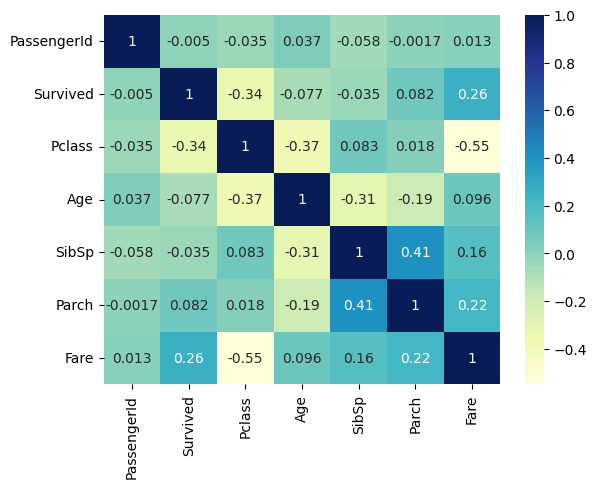

In [6]:
import seaborn as sns
sns.heatmap(titanic.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
Split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in Split.split(titanic, titanic[['Survived', 'Pclass', 'Sex']]):
    strat_train_set = titanic.loc[train_indices]
    strat_test_set = titanic.loc[test_indices]
print(strat_train_set.shape, strat_test_set.shape)

(712, 12) (179, 12)


[]

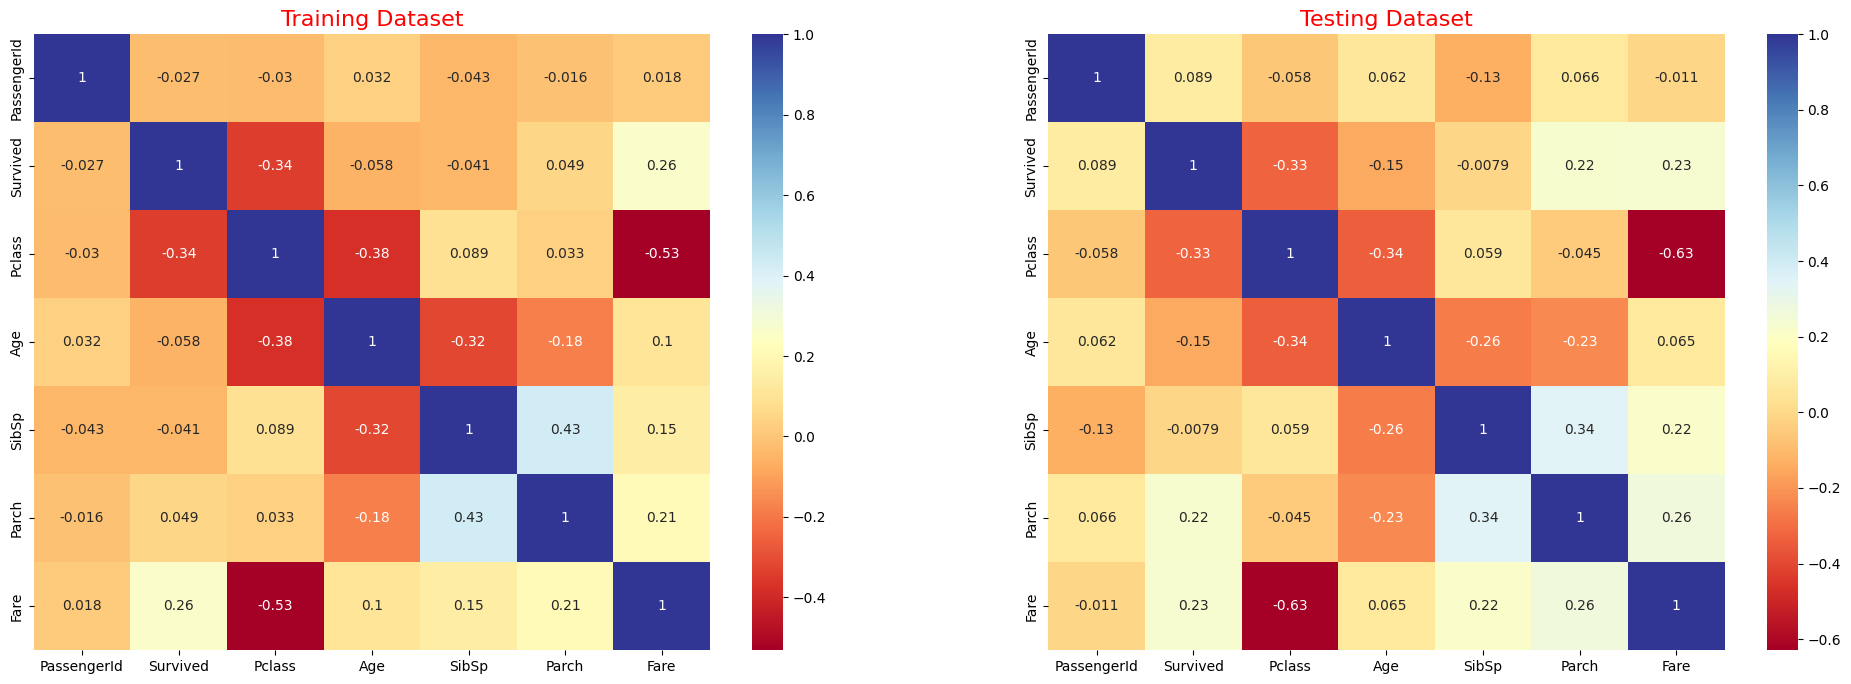

In [8]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.title("Training Dataset", c='Red', size=16)
sns.heatmap(strat_train_set.corr(), cmap="RdYlBu", annot=True)
plt.subplot(1, 2, 2)
plt.title("Testing Dataset", c='Red', size=16)
sns.heatmap(strat_test_set.corr(), cmap="RdYlBu", annot=True)
plt.plot()

In [9]:
strat_train_set.info()    # Here we can see that age and cabin column are almost empty...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 107 to 357
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class Estimate(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Imputer = SimpleImputer(strategy='mean')
        X['Age'] = Imputer.fit_transform(X[['Age']])
        return X
strat_train_set['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder
class Encoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        one = OneHotEncoder()
        matrix = one.fit_transform(X[['Embarked']]).toarray()
        column_names = ['C', 'S', 'Q', 'N']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = one.fit_transform(X[['Sex']]).toarray()
        column_names = ['Male', 'Female']
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [12]:
class FeatureDrop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, errors="ignore")

In [13]:
from sklearn.pipeline import Pipeline
Pipe = Pipeline([
    ('estimate', Estimate()),
    ('encoder', Encoder()),
    ('Features', FeatureDrop())
])
strat_train_set = Pipe.fit_transform(strat_train_set)     # Performing the Pipelining process...
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
107,108,1,3,29.519293,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
605,606,0,3,36.000000,1,0,15.5500,0.0,0.0,1.0,0.0,1.0
748,749,0,1,19.000000,1,0,53.1000,0.0,0.0,1.0,0.0,1.0
576,577,1,2,34.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
743,744,0,3,24.000000,1,0,16.1000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
316,317,1,2,24.000000,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
568,569,0,3,29.519293,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
182,183,0,3,9.000000,4,2,31.3875,0.0,0.0,1.0,0.0,1.0
500,501,0,3,17.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0


In [27]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 107 to 357
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = strat_train_set.drop(['Survived'], axis=1)
X_data = scaler.fit_transform(X_data)
Y_data = strat_train_set[['Survived']]
Y_data = Y_data.to_numpy()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [
    {"n_estimators":[10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
]
grid = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid.fit(X_data, Y_data)

C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\VISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [16]:
best = grid.best_estimator_
print("The Best estimator is at : ",best)

The Best estimator is at :  RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=10)


In [17]:
strat_test_set = Pipe.fit_transform(strat_test_set)
X_test = strat_test_set.drop(['Survived'], axis=1)
Y_test = strat_test_set[['Survived']]
X_test_data = scaler.fit_transform(X_test)
Y_test_data = Y_test.to_numpy()

In [18]:
print("The Accuracy Score is : ",best.score(X_test_data, Y_test_data)*100,"%")

The Accuracy Score is :  83.79888268156425 %


In [19]:
Testing = pd.read_csv("C:/Users/VISHU/3D Objects/Machine Learning/Datasets/Titanic-test.csv")
Testing.shape

(418, 11)

In [20]:
Testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
Testing = Pipe.fit_transform(Testing)
Testing

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [36]:
Testing = pd.DataFrame(Testing)     # Here one of the values is empty...
Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       418 non-null    float64
 1   1       418 non-null    float64
 2   2       418 non-null    float64
 3   3       418 non-null    float64
 4   4       418 non-null    float64
 5   5       417 non-null    float64
 6   6       418 non-null    float64
 7   7       418 non-null    float64
 8   8       418 non-null    float64
 9   9       418 non-null    float64
 10  10      418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB


In [58]:
idx, idy = np.where(pd.isnull(Testing))    # To check the index of null value...
# 152 (row), 5 (column)...
Testing = Testing.fillna(0)

In [59]:
np.any(pd.isnull(Testing))

False

In [65]:
Testing.shape
Testing = Testing.drop(12)